In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

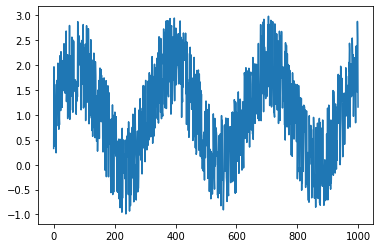

In [ ]:
#Generating sample dataset
N = 1000
Tp = 800

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()

In [ ]:
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]

In [ ]:
#Preparing data (reshaping) RNN model requires a step value that contains n number of elements as an input sequence. Here, we define it as a 'step'.
step = 4
# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))


In [ ]:
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)

In [ ]:
#RNN model requires three-dimensional input data. You can see the shape of testX below.

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape

(800, 1, 4)

In [ ]:
# SimpleRNN model  Building a model with SimpleRNN
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                1184      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Predicting and plotting the result. We'll fit model with trainX data and predict testX data.

model.fit(trainX,trainY, epochs=100, batch_size=16, verbose=2)
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)

Epoch 1/100
50/50 - 1s - loss: 1.1051 - 1s/epoch - 25ms/step
Epoch 2/100
50/50 - 0s - loss: 0.4150 - 77ms/epoch - 2ms/step
Epoch 3/100
50/50 - 0s - loss: 0.4059 - 81ms/epoch - 2ms/step
Epoch 4/100
50/50 - 0s - loss: 0.3998 - 80ms/epoch - 2ms/step
Epoch 5/100
50/50 - 0s - loss: 0.3916 - 79ms/epoch - 2ms/step
Epoch 6/100
50/50 - 0s - loss: 0.3965 - 75ms/epoch - 1ms/step
Epoch 7/100
50/50 - 0s - loss: 0.3921 - 91ms/epoch - 2ms/step
Epoch 8/100
50/50 - 0s - loss: 0.3912 - 74ms/epoch - 1ms/step
Epoch 9/100
50/50 - 0s - loss: 0.3914 - 75ms/epoch - 1ms/step
Epoch 10/100
50/50 - 0s - loss: 0.3902 - 76ms/epoch - 2ms/step
Epoch 11/100
50/50 - 0s - loss: 0.3891 - 78ms/epoch - 2ms/step
Epoch 12/100
50/50 - 0s - loss: 0.3893 - 90ms/epoch - 2ms/step
Epoch 13/100
50/50 - 0s - loss: 0.3868 - 79ms/epoch - 2ms/step
Epoch 14/100
50/50 - 0s - loss: 0.3856 - 76ms/epoch - 2ms/step
Epoch 15/100
50/50 - 0s - loss: 0.3856 - 81ms/epoch - 2ms/step
Epoch 16/100
50/50 - 0s - loss: 0.3848 - 81ms/epoch - 2ms/step
Ep

In [ ]:
#check the loss

trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.34841084480285645


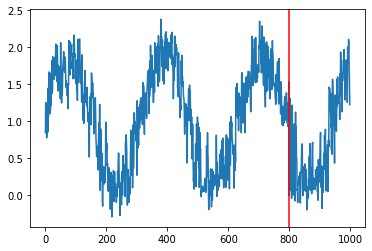

In [ ]:
index = df.index.values
plt.plot(index,predicted)
plt.axvline(df.index[Tp], c="r")
plt.show()